# Part 1 -- Intro

Load the tips dataset from seaborn

In [26]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()
len(tips)

244

In [25]:
tips['total_bill'].values

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
       18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
       26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
       16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
       28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
       12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
       18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
       10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
        8.52, 14.52,

### Filter rows by `smoker == 'No'` and `total_bill >= 10`

In [17]:
tips.loc[(tips['smoker'] == 'No') & (tips['total_bill']>=10),:]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
235,10.07,1.25,Male,No,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
242,17.82,1.75,Male,No,Sat,Dinner,2


### What is the average `total_bill` for each value of `smoker`, `day`, and `time`

In [27]:
tips.groupby(['smoker','day','time'])['total_bill'].mean().reset_index()

,smoker,day,time,total_bill
0,Yes,Thur,Lunch,19.190588
1,Yes,Thur,Dinner,NaN
2,Yes,Fri,Lunch,12.323333
3,Yes,Fri,Dinner,19.806667
4,Yes,Sat,Lunch,NaN
5,Yes,Sat,Dinner,21.276667
6,Yes,Sun,Lunch,NaN
7,Yes,Sun,Dinner,24.120000
8,No,Thur,Lunch,17.075227
9,No,Thur,Dinner,18.780000


In [22]:
tips.groupby(['smoker','day','time'])['total_bill'].mean().reset_index()['total_bill']

0     19.190588
1           NaN
2     12.323333
3     19.806667
4           NaN
5     21.276667
6           NaN
7     24.120000
8     17.075227
9     18.780000
10    15.980000
11    19.233333
12          NaN
13    19.661778
14          NaN
15    20.506667
Name: total_bill, dtype: float64

# Part 2 -- Tidy

Taken from the r4ds "Tidy Data" Chapter: https://r4ds.had.co.nz/exploratory-data-analysis.html

In [28]:
import pandas as pd

In [30]:
tbl1 = pd.read_csv('table1.csv')

In [31]:
tbl2 = pd.read_csv('table2.csv')

In [32]:
tbl3 = pd.read_csv('table3.csv')

In [33]:
tbl1

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


### Tidy the `tbl2` dataset

In [34]:
tbl2

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


In [40]:
#create a dataset that does the following:
# type | country | year | cases | population
# transform type(cases,population) and count columns into a column with the count of cases and count of population

tbl2_fixed =(tbl2.pivot_table(index=['country','year'],
                 columns=['type'],
                 values=['count']
                ).reset_index()
)

In [45]:
tbl2_fixed

country  year   count            
type                      cases  population
0     Afghanistan  1999     745    19987071
1     Afghanistan  2000    2666    20595360
2          Brazil  1999   37737   172006362
3          Brazil  2000   80488   174504898
4           China  1999  212258  1272915272
5           China  2000  213766  1280428583

### Tidy the `tbl3` dataset

In [58]:
# just give me the population
tbl3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [63]:
#code goes here
# tbl3['population'] = tbl3['rate'].str.split('/').str.get(1) -> alternative way of getting this

tbl3['population'] = tbl3['rate'].str.split('/',expand=True)[1]

In [64]:
tbl3

,country,year,rate,population
0,Afghanistan,1999,745/19987071,19987071
1,Afghanistan,2000,2666/20595360,20595360
2,Brazil,1999,37737/172006362,172006362
3,Brazil,2000,80488/174504898,174504898
4,China,1999,212258/1272915272,1272915272
5,China,2000,213766/1280428583,1280428583


# Part 3 -- Apply functions

Look at the `table3` dataset

In [21]:
tbl3 = pd.read_csv('../data/table3.csv')
tbl3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


### Write a function that takes a value of `rate` and parses out the total population.

In [95]:
tbl3.dtypes

country       object
year           int64
rate          object
population    object
pop           object
dtype: object

In [84]:
tbl3['rate'].str.split('/',expand=True)[1]

0      19987071
1      20595360
2     172006362
3     174504898
4    1272915272
5    1280428583
Name: 1, dtype: object

In [102]:
# tbl3['rate'].str.split('/',expand=True)[1]
#import numpy as np

#@np.vectorize
def rate_parse(rate):
    """
    expects an input that's a pandas dataframe
    """
    vec_output = rate['rate'].str.split('/',expand=True)[1]
    return vec_output

In [104]:
rate_parse('123/456')

TypeError: string indices must be integers, not 'str'

In [91]:
rate_parse(tbl3)

0      19987071
1      20595360
2     172006362
3     174504898
4    1272915272
5    1280428583
Name: 1, dtype: object

In [94]:
tbl3.dtypes

country       object
year           int64
rate          object
population    object
pop           object
dtype: object

### Set the population to a new column

In [92]:
tbl3['pop'] = rate_parse(tbl3)

In [93]:
tbl3

,country,year,rate,population,pop
0,Afghanistan,1999,745/19987071,19987071,19987071
1,Afghanistan,2000,2666/20595360,20595360,20595360
2,Brazil,1999,37737/172006362,172006362,172006362
3,Brazil,2000,80488/174504898,174504898,174504898
4,China,1999,212258/1272915272,1272915272,1272915272
5,China,2000,213766/1280428583,1280428583,1280428583


# Part 4 -- Plots

In [105]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Create a figure with 2 axes
### distplot of `fare` in one axes
### boxplot of `class` and `fare` on the other axes

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/ym/rlg1qq9j3c53t7sp5vx71h1c0000gn/T/ipykernel_34130/3855921161.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.fare, ax=ax1)


<Axes: xlabel='class', ylabel='fare'>

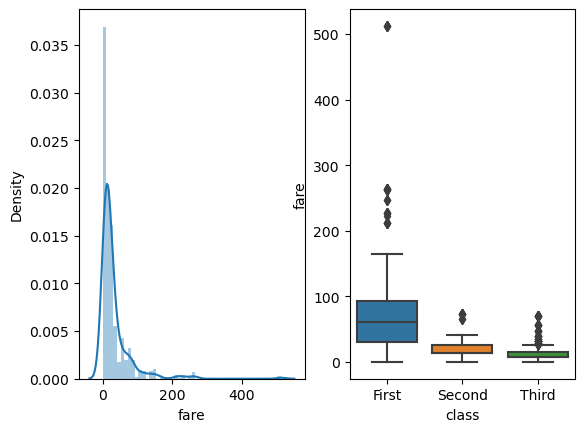

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(titanic.fare, ax=ax1)
sns.boxplot(x='class', y='fare', data=titanic, ax=ax2)

# Part 5 -- Models

In [33]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### Subset `survived`, `class`, `who`

In [57]:
titanic_subset = titanic[["survived", "class", "who"]]

### Create dummy encoded dataset

In [70]:
titanic_dummy = pd.get_dummies(titanic_subset, drop_first=True)
titanic_dummy.head()

,survived,class_Second,class_Third,who_man,who_woman
0,0,0,1,1,0
1,1,0,0,0,1
2,1,0,1,0,1
3,1,0,0,0,1
4,0,0,1,1,0


### Fit a logistic regression on `survived`

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
X = 

In [85]:
y = 

In [86]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

In [87]:
clf.coef_

array([[-0.46549873, -1.01898083, -1.23823732,  0.20337229]])